In [1]:
import pandas as pd
import seaborn as sns

In [17]:
data = pd.read_csv("plot_data.csv") # exported from wandb
data.drop(columns= ['_wandb'], inplace=True)

In [18]:
# add colum indicating method
def f(x : str):
    if 'FT' in x:
        return 'Fine-tuning (w/ freeze)'
    elif 'adapter' in x:
        return 'Adapter'
    else:
        return 'LoRA'
        
data['method'] = data['Name'].apply(f)

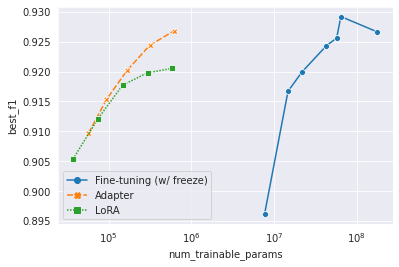

In [19]:
# plot
sns.set_style('darkgrid')
markers_dict = {'Fine-tuning (w/ freeze)':'o', 'Adapter':'X', 'LoRA':'s'}
ax = sns.lineplot(data=data, x='num_trainable_params', y='best_f1', hue='method', style='method', markers=markers_dict)
ax.set_xscale('log')
ax.legend()

In [28]:
data['num_param_ratio(%)'] = data['num_trainable_params'] / data.loc[data['Name'] == 'FT-Freeze3']['num_trainable_params'].values * 100
data['f1_ratio(%)'] = data['best_f1'] / data['best_f1'].max() * 100

# inspect by numbers
data

,Name,num_trainable_params,best_f1,method,num_param_ratio(%),f1_ratio(%)
0,FT-Freeze3,64382978,0.929225,Fine-tuning (w/ freeze),100.000000,100.000000
1,adapter-16,610178,0.926782,Adapter,0.947732,99.737091
2,Full FT,177854978,0.926650,Fine-tuning (w/ freeze),276.245342,99.722857
3,FT-Freeze4,57295106,0.925622,Fine-tuning (w/ freeze),88.991078,99.612195
4,adapter-8,315074,0.924440,Adapter,0.489375,99.485035
5,FT-Freeze6,43119362,0.924353,Fine-tuning (w/ freeze),66.973233,99.475734
6,lora-16,589824,0.920552,LoRA,0.916118,99.066672
7,adapter-4,167522,0.920246,Adapter,0.260196,99.033715
8,FT-Freeze9,21855746,0.919962,Fine-tuning (w/ freeze),33.946466,99.003144
9,LoRA-8,294912,0.919808,LoRA,0.458059,98.986607
